In [1]:
import pandas as pd

In [2]:
# Importing the data
train_data = pd.read_excel("/content/drive/MyDrive/skill_ecom_fashion/train_fashion.xlsx")

train_data.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,l,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4+,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


In [3]:
train_data.shape

(75000, 14)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_Ref_Number            75000 non-null  int64  
 1   Order_Placed_AT             75000 non-null  object 
 2   Order_Delivered_Date        67979 non-null  object 
 3   Product_Ref_ID              75000 non-null  int64  
 4   Size                        75000 non-null  object 
 5   Color_Code                  75000 non-null  object 
 6   Product_Category_Reference  75000 non-null  int64  
 7   Cost_to_Customer(USD)       75000 non-null  float64
 8   Customer_ID                 75000 non-null  int64  
 9   Gender                      75000 non-null  object 
 10  Customer_BirthDate          68445 non-null  object 
 11  Customer_Location           75000 non-null  object 
 12  Customer_Joining_Date       75000 non-null  object 
 13  Order_Repeat_Chance         750

In [5]:
# Checking for missing values 
train_data.isna().sum()

Order_Ref_Number                 0
Order_Placed_AT                  0
Order_Delivered_Date          7021
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            6555
Customer_Location                0
Customer_Joining_Date            0
Order_Repeat_Chance              0
dtype: int64

In [6]:
# Converting to datetime
train_data['Order_Delivered_Date'] = pd.to_datetime(train_data['Order_Delivered_Date'])
train_data['Customer_BirthDate'] = pd.to_datetime(train_data['Customer_BirthDate'])
train_data['Order_Placed_AT'] = pd.to_datetime(train_data['Order_Placed_AT'])

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Order_Ref_Number            75000 non-null  int64         
 1   Order_Placed_AT             75000 non-null  datetime64[ns]
 2   Order_Delivered_Date        67979 non-null  datetime64[ns]
 3   Product_Ref_ID              75000 non-null  int64         
 4   Size                        75000 non-null  object        
 5   Color_Code                  75000 non-null  object        
 6   Product_Category_Reference  75000 non-null  int64         
 7   Cost_to_Customer(USD)       75000 non-null  float64       
 8   Customer_ID                 75000 non-null  int64         
 9   Gender                      75000 non-null  object        
 10  Customer_BirthDate          68445 non-null  datetime64[ns]
 11  Customer_Location           75000 non-null  object    

In [7]:
import numpy as np

In [8]:
# Extracting the difference between Order Date and Delivered Date
# Here the Order Delivered Date has NaT values.Replacing the NaT with Delivered date
cols = [0]*train_data.shape[0]
for val in range(0,train_data.shape[0]):
  if (train_data['Order_Delivered_Date'].isnull()[val]==True):
    a = train_data['Order_Delivered_Date'][val]
    b = train_data['Order_Placed_AT'][val]
    a = b
    cols[val] = np.abs(a - b)
  else:
    cols[val] = np.abs(train_data['Order_Placed_AT'][val] - train_data['Order_Delivered_Date'][val]) 

In [ ]:
df = pd.DataFrame(cols)
df['Number of days'] = pd.to_numeric(df[0].dt.days, downcast='integer')

In [ ]:
df = df.drop(columns=0)

In [ ]:
new_train_data = df.join(train_data)

In [ ]:
new_train_data = new_train_data.drop(columns=['Order_Delivered_Date','Customer_BirthDate','Customer_Joining_Date','Order_Placed_AT'])

new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number of days              75000 non-null  int16  
 1   Order_Ref_Number            75000 non-null  int64  
 2   Product_Ref_ID              75000 non-null  int64  
 3   Size                        75000 non-null  object 
 4   Color_Code                  75000 non-null  object 
 5   Product_Category_Reference  75000 non-null  int64  
 6   Cost_to_Customer(USD)       75000 non-null  float64
 7   Customer_ID                 75000 non-null  int64  
 8   Gender                      75000 non-null  object 
 9   Customer_Location           75000 non-null  object 
 10  Order_Repeat_Chance         75000 non-null  int64  
dtypes: float64(1), int16(1), int64(5), object(4)
memory usage: 5.9+ MB


In [ ]:
import seaborn as sn

Order_Repeat_Chance: Target variable with two classes(1 and 0). If it is 1 then there is a good chance that the type of order can be repeated by any customer or same customer. If it is 0 then there is no good chance that the type of order can be repeated by any customer or same customer.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


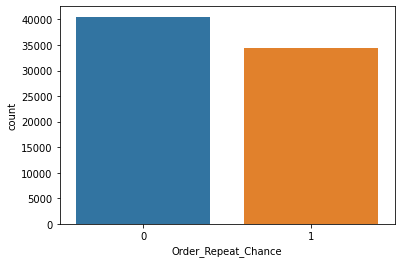

In [ ]:
sn.countplot('Order_Repeat_Chance',data=train_data);
# It is not an imbalanced dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


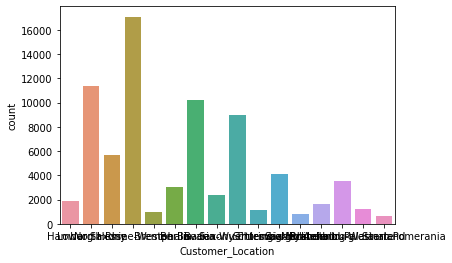

In [ ]:
sn.countplot('Customer_Location',data=new_train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


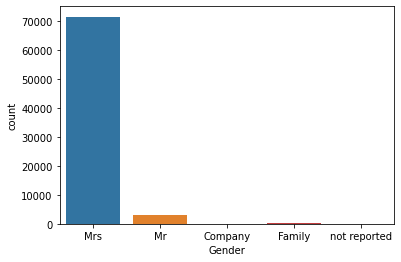

In [ ]:
sn.countplot('Gender',data=new_train_data);

In [ ]:
new_train_data['Gender'].value_counts()

Mrs             71614
Mr               2903
Family            307
Company            88
not reported       88
Name: Gender, dtype: int64

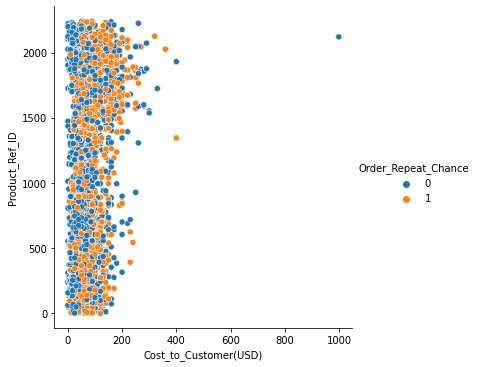

In [ ]:
# Visualizing the realtionship between Cost of the product and Product Ref
sn.relplot(x = 'Cost_to_Customer(USD)',y = 'Product_Ref_ID',hue = 'Order_Repeat_Chance',data=train_data);


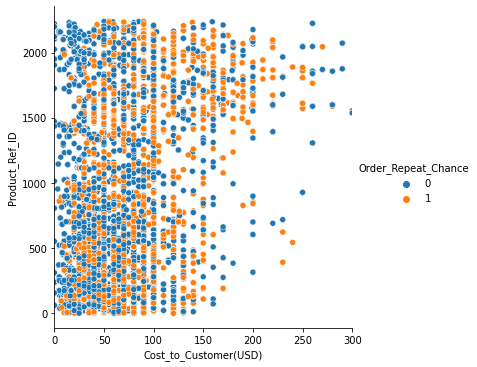

In [ ]:
# Visualizing the realtionship between Cost of the product and Product Ref
sn.relplot(x = 'Cost_to_Customer(USD)',y = 'Product_Ref_ID',hue = 'Order_Repeat_Chance',data=train_data).set(xlim=(0,300))

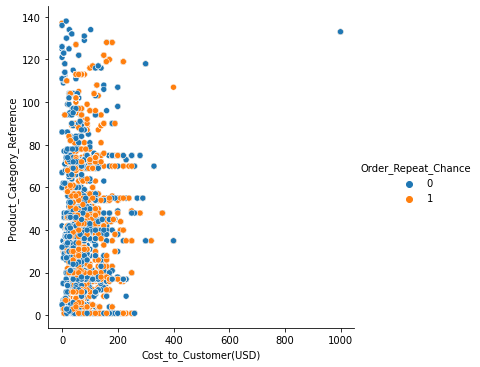

In [ ]:
# Visualizing the realtionship between Cost of the product and Product Category Ref
sn.relplot(x = 'Cost_to_Customer(USD)',y = 'Product_Category_Reference',hue = 'Order_Repeat_Chance',data=train_data);

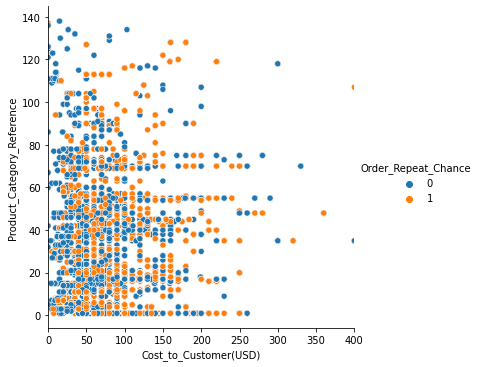

In [ ]:
sn.relplot(x = 'Cost_to_Customer(USD)',y = 'Product_Category_Reference',hue = 'Order_Repeat_Chance',data=train_data).set(xlim=(0,400));

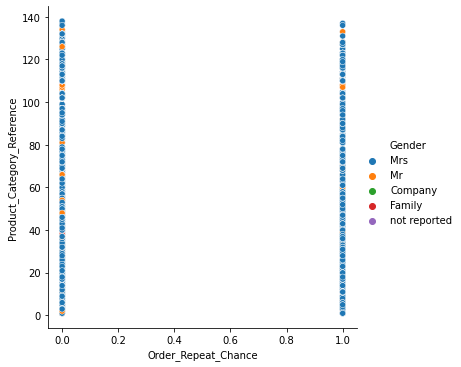

In [ ]:
sn.relplot(x = 'Order_Repeat_Chance',y = 'Product_Category_Reference',hue ='Gender' ,data=train_data);

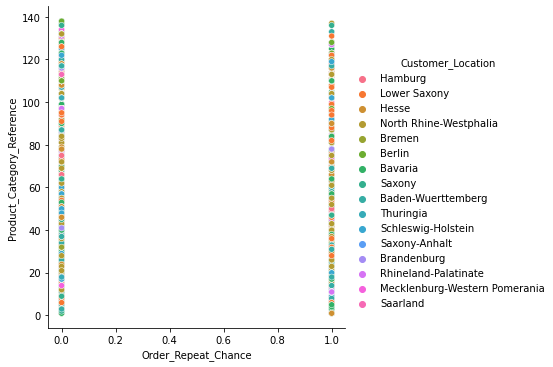

In [ ]:
sn.relplot(x = 'Order_Repeat_Chance',y = 'Product_Category_Reference',hue ='Customer_Location' ,data=train_data);

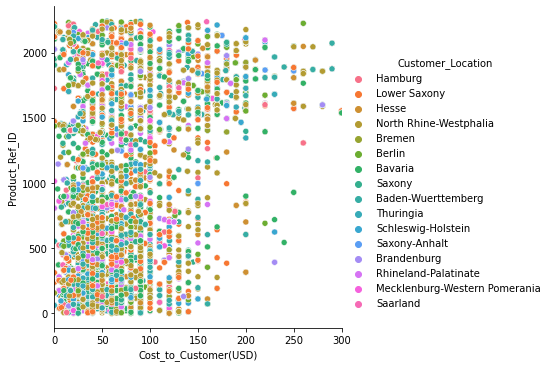

In [ ]:
sn.relplot(x = 'Cost_to_Customer(USD)',y = 'Product_Ref_ID',hue = 'Customer_Location',data=train_data).set(xlim=(0,300));

In [ ]:
new_train_data.iloc[:,:]

,Number of days,Order_Ref_Number,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_Location,Order_Repeat_Chance
0,1,98981,897,l,grey,33,19.9,48040,Mrs,Hamburg,0
1,5,69825,1557,xl,petrol,31,89.9,42892,Mrs,Lower Saxony,1
2,5,9929,292,4+,grey,4,64.9,32479,Mrs,Hesse,0
3,1,75600,1445,xxl,grey,29,59.9,4216,Mrs,Lower Saxony,0
4,1,95622,1415,m,mahagoni,3,21.9,39571,Mrs,North Rhine-Westphalia,0
...,...,...,...,...,...,...,...,...,...,...,...
74995,1,6266,434,s,orange,28,59.9,32000,Mrs,Lower Saxony,1
74996,3,54887,2116,7,black,64,90.0,40122,Mrs,Bavaria,1
74997,2,76821,2060,46,brown,1,159.9,44106,Mrs,North Rhine-Westphalia,1
74998,3,861,1,42,magenta,1,119.9,30991,Mrs,Hesse,1


In [ ]:
new_train_data_one_hot = new_train_data.iloc[:,:-1]
new_train_data_one_hot = pd.get_dummies(new_train_data.iloc[:,:-1],columns=['Size','Color_Code','Gender','Customer_Location'])

new_train_data_one_hot.head()

,Number of days,Order_Ref_Number,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Size_1,Size_10,Size_10+,Size_100,Size_104,Size_105,Size_11,Size_11+,Size_116,Size_12,Size_128,Size_13,Size_14,Size_140,Size_152,Size_164,Size_176,Size_18,Size_19,Size_2,Size_2+,Size_20,Size_21,Size_22,Size_23,Size_24,Size_25,Size_26,Size_27,Size_28,Size_29,Size_3,Size_3+,Size_30,...,Color_Code_mocca,Color_Code_nature,Color_Code_navy,Color_Code_ocher,Color_Code_olive,Color_Code_opal,Color_Code_orange,Color_Code_pallid,Color_Code_petrol,Color_Code_pink,Color_Code_purple,Color_Code_red,Color_Code_silver,Color_Code_stained,Color_Code_striped,Color_Code_terracotta,Color_Code_turquoise,Color_Code_white,Color_Code_yellow,Gender_Company,Gender_Family,Gender_Mr,Gender_Mrs,Gender_not reported,Customer_Location_Baden-Wuerttemberg,Customer_Location_Bavaria,Customer_Location_Berlin,Customer_Location_Brandenburg,Customer_Location_Bremen,Customer_Location_Hamburg,Customer_Location_Hesse,Customer_Location_Lower Saxony,Customer_Location_Mecklenburg-Western Pomerania,Customer_Location_North Rhine-Westphalia,Customer_Location_Rhineland-Palatinate,Customer_Location_Saarland,Customer_Location_Saxony,Customer_Location_Saxony-Anhalt,Customer_Location_Schleswig-Holstein,Customer_Location_Thuringia
0,1,98981,897,33,19.9,48040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,69825,1557,31,89.9,42892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5,9929,292,4,64.9,32479,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,75600,1445,29,59.9,4216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,95622,1415,3,21.9,39571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
pf = pd.DataFrame()
pf['Order_Repeat_Chance'] = new_train_data['Order_Repeat_Chance']

In [ ]:
new_train_data2 = pf.join(new_train_data_one_hot,how = "right")

In [ ]:
new_train_data2.head()

,Order_Repeat_Chance,Number of days,Order_Ref_Number,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Size_1,Size_10,Size_10+,Size_100,Size_104,Size_105,Size_11,Size_11+,Size_116,Size_12,Size_128,Size_13,Size_14,Size_140,Size_152,Size_164,Size_176,Size_18,Size_19,Size_2,Size_2+,Size_20,Size_21,Size_22,Size_23,Size_24,Size_25,Size_26,Size_27,Size_28,Size_29,Size_3,Size_3+,...,Color_Code_mocca,Color_Code_nature,Color_Code_navy,Color_Code_ocher,Color_Code_olive,Color_Code_opal,Color_Code_orange,Color_Code_pallid,Color_Code_petrol,Color_Code_pink,Color_Code_purple,Color_Code_red,Color_Code_silver,Color_Code_stained,Color_Code_striped,Color_Code_terracotta,Color_Code_turquoise,Color_Code_white,Color_Code_yellow,Gender_Company,Gender_Family,Gender_Mr,Gender_Mrs,Gender_not reported,Customer_Location_Baden-Wuerttemberg,Customer_Location_Bavaria,Customer_Location_Berlin,Customer_Location_Brandenburg,Customer_Location_Bremen,Customer_Location_Hamburg,Customer_Location_Hesse,Customer_Location_Lower Saxony,Customer_Location_Mecklenburg-Western Pomerania,Customer_Location_North Rhine-Westphalia,Customer_Location_Rhineland-Palatinate,Customer_Location_Saarland,Customer_Location_Saxony,Customer_Location_Saxony-Anhalt,Customer_Location_Schleswig-Holstein,Customer_Location_Thuringia
0,0,1,98981,897,33,19.9,48040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,5,69825,1557,31,89.9,42892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,5,9929,292,4,64.9,32479,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,75600,1445,29,59.9,4216,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,95622,1415,3,21.9,39571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Handling Categorical variables
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Number of days              75000 non-null  int16  
 1   Order_Ref_Number            75000 non-null  int64  
 2   Product_Ref_ID              75000 non-null  int64  
 3   Size                        75000 non-null  object 
 4   Color_Code                  75000 non-null  object 
 5   Product_Category_Reference  75000 non-null  int64  
 6   Cost_to_Customer(USD)       75000 non-null  float64
 7   Customer_ID                 75000 non-null  int64  
 8   Gender                      75000 non-null  object 
 9   Customer_Location           75000 non-null  object 
 10  Order_Repeat_Chance         75000 non-null  int64  
dtypes: float64(1), int16(1), int64(5), object(4)
memory usage: 5.9+ MB


In [ ]:
encoder = OrdinalEncoder()
# Encoding the categorical variables and handling the missing values using Extratreeregressor

cat_cols = ['Size','Color_Code','Gender','Customer_Location']

def encode(new_train_data):
    '''function to encode non-null new_train_data and replace it in the original new_train_data'''
    #retains only non-null values
    nonulls = np.array(new_train_data.dropna())
    #reshapes the new_train_data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    new_train_data.loc[new_train_data.notnull()] = np.squeeze(impute_ordinal)
    return new_train_data

#create a for loop to iterate through each column in the new_train_data
for columns in cat_cols:
    encode(new_train_data[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

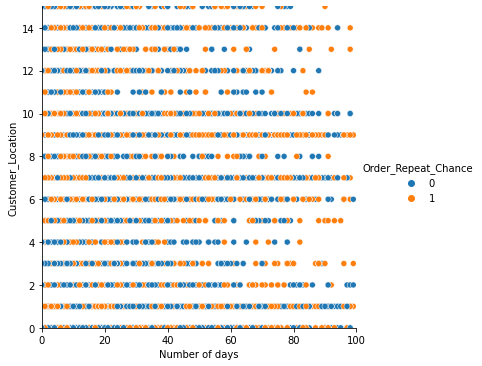

In [ ]:
# Visualizing the realtionship Number of days and Customer Location
sn.relplot(x='Number of days',y = 'Customer_Location',data=new_train_data,hue='Order_Repeat_Chance').set(xlim=(0,100),ylim=(0,15));

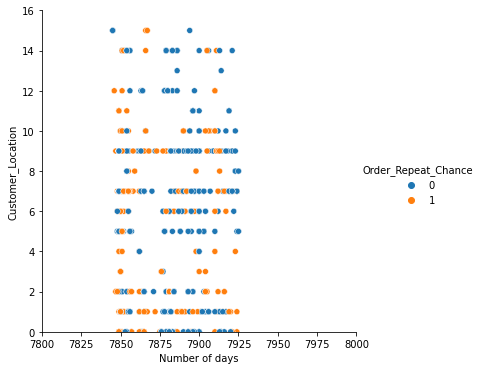

In [ ]:
# Outliers where number of days are more than 7000 days
sn.relplot(x='Number of days',y = 'Customer_Location',data=new_train_data,hue='Order_Repeat_Chance').set(xlim=(7800,8000),ylim=(0,16));

In [ ]:
new_train_data.shape

(75000, 11)

In [ ]:
# Removing the features where the number of days is more than 7000
for i in range(0,new_train_data.shape[0]):
  if (new_train_data['Number of days'][i]>7000):
    new_train_data = new_train_data.drop(labels=i)

In [ ]:
new_train_data.shape

(74200, 11)

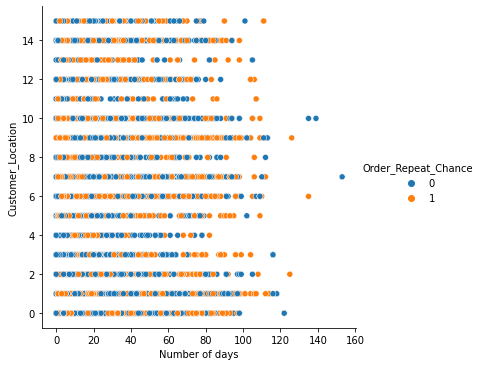

In [ ]:
sn.relplot(x='Number of days',y = 'Customer_Location',data=new_train_data,hue='Order_Repeat_Chance');

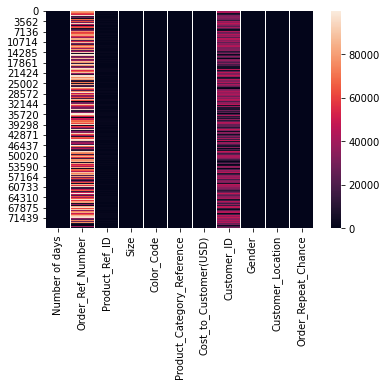

In [ ]:
sn.heatmap(new_train_data)

# Selecting Features 

In [ ]:
import matplotlib.pyplot as plt

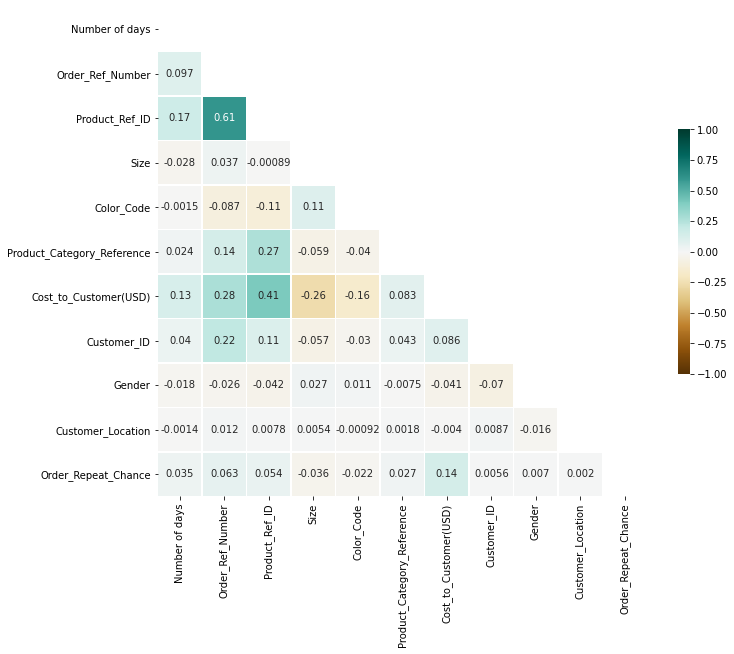

In [ ]:
# Cor-realtion plot to determine how each features behave with each other
corr = new_train_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap='BrBG', vmax=1,  vmin = -1, annot = True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
new_train_data2.columns[1:]

Index(['Number of days', 'Order_Ref_Number', 'Product_Ref_ID',
       'Product_Category_Reference', 'Cost_to_Customer(USD)', 'Customer_ID',
       'Size_1', 'Size_10', 'Size_10+', 'Size_100',
       ...
       'Customer_Location_Hesse', 'Customer_Location_Lower Saxony',
       'Customer_Location_Mecklenburg-Western Pomerania',
       'Customer_Location_North Rhine-Westphalia',
       'Customer_Location_Rhineland-Palatinate', 'Customer_Location_Saarland',
       'Customer_Location_Saxony', 'Customer_Location_Saxony-Anhalt',
       'Customer_Location_Schleswig-Holstein', 'Customer_Location_Thuringia'],
      dtype='object', length=203)

We assume to null hypothesis to be “The selected combination of dependent variables do not have any effect on the independent variable”.
Then we build a small regression model and calculate the p values.
If the p values is higher than the threshold, we discard that combination of features.

In [ ]:
import statsmodels.formula.api as sm

sm.logit

<bound method Model.from_formula of <class 'statsmodels.discrete.discrete_model.Logit'>>

In [ ]:
selected_columns = new_train_data2.columns[1:].values

import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_logit = sm.ols('Y~x',data=new_train_data2).fit()
        maxVar = max(regressor_logit.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_logit.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_logit.summary()
    return x, columns

In [ ]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(new_train_data2.iloc[:,1:].values, new_train_data2.iloc[:,0:1].values, SL, selected_columns)

In [ ]:
data_modeled

array([[1.0000e+00, 9.8981e+04, 8.9700e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.0000e+00, 6.9825e+04, 1.5570e+03, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.0000e+00, 9.9290e+03, 2.9200e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0000e+00, 7.6821e+04, 2.0600e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.0000e+00, 8.6100e+02, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.5796e+04, 1.7500e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
selected_columns

array(['Number of days', 'Order_Ref_Number', 'Product_Ref_ID',
       'Product_Category_Reference', 'Cost_to_Customer(USD)',
       'Customer_ID', 'Size_1', 'Size_10', 'Size_10+', 'Size_37+',
       'Size_38+', 'Size_39+', 'Size_4', 'Size_4+', 'Size_40', 'Size_40+',
       'Size_4032', 'Size_4034', 'Size_41', 'Size_41+', 'Size_42+',
       'Size_43', 'Size_43+', 'Size_44', 'Size_44+', 'Size_45',
       'Size_45+', 'Size_46', 'Size_46+', 'Size_47', 'Size_48', 'Size_5',
       'Size_50', 'Size_52', 'Size_54', 'Size_56', 'Size_58', 'Size_xl',
       'Size_xs', 'Size_xxl', 'Color_Code_?', 'Color_Code_almond',
       'Color_Code_amethyst', 'Color_Code_ancient',
       'Color_Code_anthracite', 'Color_Code_apricot', 'Color_Code_aqua',
       'Color_Code_aquamarine', 'Color_Code_aubergine',
       'Color_Code_baltic blue', 'Color_Code_basalt', 'Color_Code_beige',
       'Color_Code_blau', 'Color_Code_blue', 'Color_Code_brwon',
       'Color_Code_caramel', 'Color_Code_champagner',
       'Color

In [ ]:
result = pd.DataFrame()
result['Order_Repeat_Chance'] = new_train_data.iloc[:,-1]

In [ ]:
pre_proc_data = pd.DataFrame(data = data_modeled, columns = selected_columns)

## Visualzing the features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

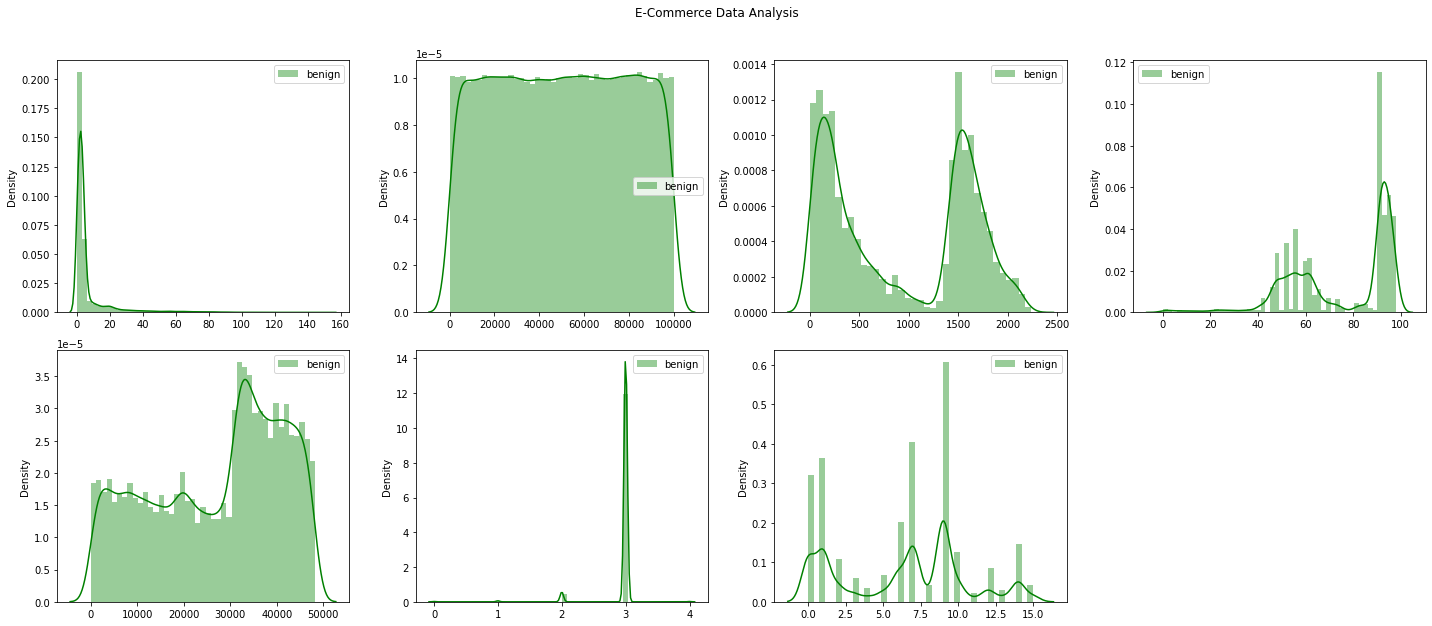

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in pre_proc_data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sn.distplot(x = pre_proc_data[i], color='g', label = 'benign')
    #sn.distplot( np.logical_and(pre_proc_data[i], result['Order_Repeat_Chance']==1), color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('E-Commerce Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


# Building Model

In [ ]:
X = pre_proc_data
print("X shape",X.shape)

y = result['Order_Repeat_Chance']
print("Y shape",y.shape)

X shape (75000, 76)
Y shape (75000,)


In [ ]:
# Splitting the dataset into Train and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 18,shuffle=True)

print("X_Train set shape",X_train.shape)
print("X_Test set shape",X_test.shape)
print("Y Train set shape",y_train.shape)
print("Y Train set shape",y_train.shape)

X_Train set shape (52500, 76)
X_Test set shape (22500, 76)
Y Train set shape (52500,)
Y Train set shape (52500,)


## Model 1

In [ ]:
#Fitting the Classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth = 1,random_state = 50,max_leaf_nodes=100)
model1.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [ ]:
# Model performance on Training set
y_pred_train = model1.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

accuracy = metrics.accuracy_score(y_train,y_pred_train)
print('Accuracy:{:.5f}'.format(accuracy))
cm = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix \n",cm)
print(classification_report(y_train, y_pred_train))

Accuracy:0.55316
Confusion Matrix 
 [[ 5009 23378]
 [   81 24032]]
              precision    recall  f1-score   support

           0       0.98      0.18      0.30     28387
           1       0.51      1.00      0.67     24113

    accuracy                           0.55     52500
   macro avg       0.75      0.59      0.49     52500
weighted avg       0.76      0.55      0.47     52500



In [ ]:
# Model performance on Test set
y_pred = model1.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy:{:.5f}'.format(accuracy))
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",cm)
print(classification_report(y_test, y_pred))

Accuracy:0.55671
Confusion Matrix 
 [[ 2169  9949]
 [   25 10357]]
              precision    recall  f1-score   support

           0       0.99      0.18      0.30     12118
           1       0.51      1.00      0.67     10382

    accuracy                           0.56     22500
   macro avg       0.75      0.59      0.49     22500
weighted avg       0.77      0.56      0.47     22500



## Model 2

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Setup arrays to store training and test accuracies
max_depth = np.arange(1,9)
train_accuracy =np.empty(len(max_depth))
test_accuracy = np.empty(len(max_depth))


for i,k in enumerate(max_depth):
    #Setup a knn classifier with k neighbors
    model2 = XGBClassifier(learning_rate=0.01,n_estimators = 100,max_depth=k)
    
    #Fit the model
    model2.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = model2.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = model2.score(X_test, y_test) 

In [ ]:
import matplotlib.pyplot as plt

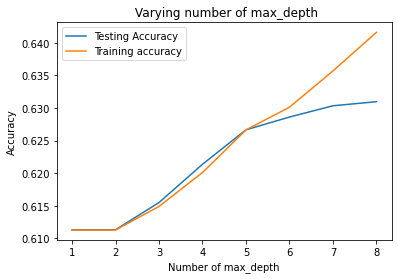

In [ ]:
#Generate plot
plt.title(' Varying number of max_depth')
plt.plot(max_depth, test_accuracy, label='Testing Accuracy')
plt.plot(max_depth, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of max_depth')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
xgb = XGBClassifier(learning_rate=0.01,n_estimators = 100,max_depth=6)

xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# make predictions for train data
y_pred_train2 = xgb.predict(X_train)
predictions = [round(value) for value in y_pred_train2]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 63.01333%


In [ ]:
print(classification_report(y_train, y_pred_train2))
cm_t= confusion_matrix(y_train,y_pred_train2)
print("Confusion Matrix \n",cm_t)

              precision    recall  f1-score   support

           0       0.71      0.53      0.61     28387
           1       0.58      0.75      0.65     24113

    accuracy                           0.63     52500
   macro avg       0.64      0.64      0.63     52500
weighted avg       0.65      0.63      0.63     52500

Confusion Matrix 
 [[15085 13302]
 [ 6116 17997]]


In [ ]:
# make predictions for test data
y_pred2 = xgb.predict(X_test)
predictions = [round(value) for value in y_pred2]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 62.86222%


In [ ]:
print(classification_report(y_test, y_pred2))
cm2 = confusion_matrix(y_test,y_pred2)
print("Confusion Matrix \n",cm2)

              precision    recall  f1-score   support

           0       0.70      0.54      0.61     12118
           1       0.58      0.74      0.65     10382

    accuracy                           0.63     22500
   macro avg       0.64      0.64      0.63     22500
weighted avg       0.65      0.63      0.63     22500

Confusion Matrix 
 [[6487 5631]
 [2725 7657]]


## Model 3

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train,y_train)
gnb_train_pred = gnb.predict(X_train)

gnb_pred = gnb.predict(X_test)

In [ ]:
print("Training Accuracy:",metrics.accuracy_score(y_train, gnb_train_pred))

print("Testing Accuracy:",metrics.accuracy_score(y_test, gnb_pred))

Training Accuracy: 0.5428571428571428
Testing Accuracy: 0.5403863432165319


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,y_pred2)

0.6074946304422704

## Model 4

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=20, max_features=4, max_depth=6)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_depth - Slightly higher than single tree
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#####predicting on test data ####
Forest_predict_train=forest.predict(X_train)
Forest_predict=forest.predict(X_test)

########Train Data Validation
cm1 = confusion_matrix(y_train,Forest_predict_train)
print("Confusion Matrix for Train data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_tree)

########Test Data Validation
cm1 = confusion_matrix(y_test,Forest_predict)
print("Confusion Matrix for test data \n", cm1)
total1=sum(sum(cm1))
accuracy_tree=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of test data \n", accuracy_tree)


Confusion Matrix for Train data 
 [[16393 11540]
 [ 8660 15347]]
Accuracy of Train data 
 0.6110897189064305
Confusion Matrix for test data 
 [[6922 5142]
 [3731 6465]]
Accuracy of test data 
 0.601392632524708


## Model 5

In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,24)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


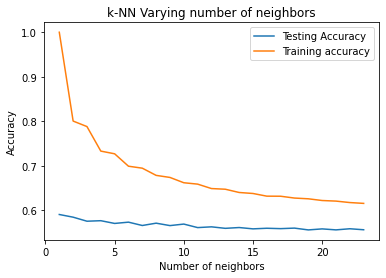

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.562848158131177

# Building the model without feature selection

In [ ]:
X = new_train_data2.iloc[:,:-1]
print("X shape",X.shape)

y = new_train_data2['Order_Repeat_Chance']
print("Y shape",y.shape)

X shape (74200, 10)
Y shape (74200,)


In [ ]:
# Splitting the dataset into Train and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 18,shuffle=True)

print("X_Train set shape",X_train.shape)
print("X_Test set shape",X_test.shape)
print("Y Train set shape",y_train.shape)
print("Y Train set shape",y_train.shape)

X_Train set shape (51940, 10)
X_Test set shape (22260, 10)
Y Train set shape (51940,)
Y Train set shape (51940,)


In [ ]:
model22 = XGBClassifier()
model22.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# make predictions for train data
y_pred_train22 = model22.predict(X_train)
predictions = [round(value) for value in y_pred_train22]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 63.51752%


In [ ]:
# make predictions for test data
y_pred22 = model22.predict(X_test)
predictions = [round(value) for value in y_pred22]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.5f%%" % (accuracy * 100.0))

Accuracy: 62.79874%


In [ ]:
roc_auc_score(y_test,y_pred22)

0.6371375516013457

## Building model using Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
scaler = StandardScaler()
# Scaling out Train and Test set
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:

NN = keras.Sequential(
    [
     layers.Dense(10, activation="relu", name="layer1"),
     layers.Dense(5, activation="relu", name="layer2"),
     layers.Dense(5, activation="relu", name="layer3"),
     layers.Dense(1, activation="sigmoid")
    ]
)

In [ ]:
NN.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
NN.fit(scaled_X_train,y_train,epochs=100,batch_size=10)


# evaluate the keras model
accuracy = NN.evaluate(scaled_X_train, y_train)

Epoch 1/100
5194/5194 [==============================] - 12s 2ms/step - loss: 0.6858 - accuracy: 0.5543
Epoch 2/100
5194/5194 [==============================] - 11s 2ms/step - loss: 0.6718 - accuracy: 0.5747
Epoch 3/100
5194/5194 [==============================] - 11s 2ms/step - loss: 0.6691 - accuracy: 0.5740
Epoch 4/100
5194/5194 [==============================] - 11s 2ms/step - loss: 0.6634 - accuracy: 0.5827
Epoch 5/100
5194/5194 [==============================] - 12s 2ms/step - loss: 0.6527 - accuracy: 0.5966
Epoch 6/100
5194/5194 [==============================] - 12s 2ms/step - loss: 0.6382 - accuracy: 0.6104
Epoch 7/100
5194/5194 [==============================] - 12s 2ms/step - loss: 0.6269 - accuracy: 0.6075
Epoch 8/100
5194/5194 [==============================] - 11s 2ms/step - loss: 0.6182 - accuracy: 0.6118
Epoch 9/100
5194/5194 [==============================] - 11s 2ms/step - loss: 0.6168 - accuracy: 0.6132
Epoch 10/100
5194/5194 [==============================] - 11s 2m